In [2]:
# how to read csv data or how to load csv file
''' (ETL)first extract the data after  reading  the data  we get raw data and send to the data transformation phase so 
at the end we will get featurized data and we can send this data for data analysis purpose
'''

!pip install seaborn

In [3]:
# how to read csv data or how to load csv file
''' (ETL)first extract the data after  reading  the data  we get raw data and send to the data transformation phase so 
at the end we will get featurized data and we can send this data for data analysis purpose
'''

!pip install seaborn

In [4]:
'''1st read/modify/manipuliating the data using pandas 
  2nd we can perform numerical computation/meadian/variation/percentile value
  3rd data visulaization using matplotlib module or if we need very fast then we can use seaborn
  and for dynamic plot we can use plotly'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
'''reading the csv file using pandas with read_csv() 1st parameter is  local path of the file
    1st file path /filename problem is files are named in different in different os / for windows and \ mac so for this
    problem we can solve with the raw string anything between " " is called normal string so we have to convert from normal
    string to raw string just add the r/R so after that whatever the path you entered it doesn't matter either its 
    windows or linux. (UNICODE ERROR issue will resolved )
    below the result we get 2D dataframe so in pandas we have two type of dataframe 1 dimensional 2 dimensional data frame
    1D- array,list (series)   2D -collection of list,array
'''
'''storing the dataframe in dataframe object'''
comments = pd.read_csv(r'E:\template\data analysis/Uscomments.csv',error_bad_lines=False)

C:\Users\Tanmay Sarkar\AppData\Local\Temp\ipykernel_9992\361135908.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'E:\template\data analysis/Uscomments.csv',error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\Tanmay Sarkar\AppData\Local\Temp\ipykernel_9992\361135908.py:10: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'E:\template\data analysis/Uscomments.csv',error_bad_lines=False)


In [6]:
'''1st 5 rows in column dataframe'''
comments.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
'''checking is missing value is present or not 
    isnull() returns the boolean dataframe is false means- not present missing value True- present missing value
'''
comments.isnull()

video_id  comment_text  likes  replies
0          False         False  False    False
1          False         False  False    False
2          False         False  False    False
3          False         False  False    False
4          False         False  False    False
...          ...           ...    ...      ...
691395     False         False  False    False
691396     False         False  False    False
691397     False         False  False    False
691398     False         False  False    False
691399     False         False  False    False

[691400 rows x 4 columns]

In [8]:
'''sum() shows total missing value in features'''
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [9]:
'''so we have to drop the missing value from the features 
   dropna(inplace=True) remove the missing values
'''
comments.dropna(inplace=True)

In [10]:
'''after dropping the missing value checking again'''
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
'''              PERFORMING SENTIMENT ANALYSIS

   performing exploratory data analysis
   analysing the sentiment of user like user1- very helpful sentiment value would lie of between 0 to 1 more close to 1 means
   (positive sentiment) and more closer to 0 means (neutral sentiment)[0,1]
    
   user2-unable to understand sentiment vlaue range will be [-1,0] more closer to -1 it will be more negative sentiment
   more closer to 0 means more neutral sentiment
   so range of the sentiment or polarity value[-1,1]  1=positive sentiment -1 negative sentiment
   
   packages that we use for sentiment analysis is TEXTBLOB
   so install textblob by using pip
'''
!pip install textblob

In [12]:
'''from package import function '''
from textblob import TextBlob

In [13]:
comments.head(6)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0

In [14]:
'''wanted to check the textblob'''
'''and wanted to show sentiment of the textblob and if we wanted to see the polarity attribute 0.0 means neutral sentiment'''
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [15]:
'''checking how many data points present in the csv file
    so we have approx 700k data so it will take time to iterate through this data so we have to take sample data less amount
    of data
    
'''
comments.shape

(691375, 4)

In [16]:
'''fetching the sample data like from 700k data we want only 1k data or 2k data'''
sample_df=comments[0:1000]

In [17]:
'''1st 1000 sample row'''
sample_df.shape

(1000, 4)

In [18]:
'''wanted to see the sentiment analysis for each of the row(comment_text) means we have to iterate using for loop
    for comment in comments dataframe with feature ['commnets_text'] and the moment we extract each comment we can pass
    to the textblob and i need polarity value the moment i get the polarity value we have to store each commnets polarity value
    in the list
'''
'''now one scenarios that what if there is an empty comment in the comment then it will return exception thats why we need to
    handle the exceptionusing try exception
'''
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [19]:
len(polarity)

691375

In [20]:
'''inserting list in to the dataframe polarity feature
    getting new features in the comments dataframe polarity
'''

comments['polarity']= polarity

In [21]:
comments.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [22]:
'''wordcloud analysis of your data
    graphical representation of text data so we are able to see which are my most important key words
    to getting the all the positve feedback 
    dataframe for positive polarity
'''
filter1=comments['polarity']==1

In [23]:
comments_positive=comments[filter1]

In [24]:
'''getting all the negative feedback means getting al the poarity ==-1
    dataframe for negative polarity
'''
filter2=comments['polarity']==-1

In [25]:
comments_negative=comments[filter2]

In [26]:
'''getting  the positive value from  polarity '''
comments_positive.head(5)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [27]:
'''now we need to perform wordcloud analysis'''
!pip install wordcloud

In [28]:
'''from this package we need to import classes like wordCloud STOPWORDS
    so STOPWORD IS THOOSE WORD THAT DOESNT MAKE ANY SENSE IN MY ANALYSIS meaningless words like are,the,and,is,to,from
    so exclude these words

'''
from wordcloud import WordCloud,STOPWORDS


In [29]:
''' unique stopwords define in the wordcloud package'''

set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [30]:
'''these are all the rows in the series data'''
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [31]:
'''checking the datatype
    its a series datastructure
'''
type(comments['comment_text'])

pandas.core.series.Series

In [32]:
'''so this data is present in the series datastructure for stopwords we need to covert this into string data type
    in python we can do using join()
    join each of the row of comments feature
'''

'''storing all the positive comments which we can find by polarity value we need to convert in a string'''
total_comments_positive= ' '.join(comments_positive['comment_text'])

In [33]:
'''stopwords : set of strings or None
    The words that will be eliminated. If None, the build-in STOPWORDS
    list will be used. Ignored if using generate_from_frequencies.
    these are the list of stopword that we dont need
    after that we need to generate the wordcloud
    
    after we getting the string format we need to pass thoose string into wordcloud function 
    '''
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

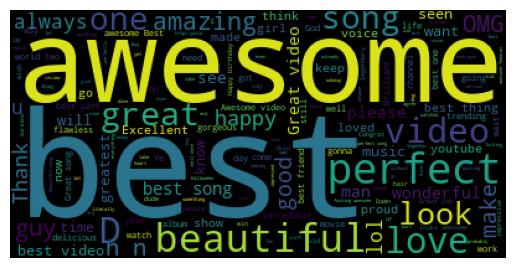

In [34]:
'''
    this for positive comments
if you want to generate  wordcloud as view you can use imshow() from matplotlib
    after that we get the positive keyword that we can show to our stakeholder or client
    this shows positive polarity data
'''
plt.imshow(wordcloud)
plt.axis('off')

In [35]:
'''storing all the negative comments which we can find by polarity value we need to convert in a string'''
total_comments_negative= ' '.join(comments_negative['comment_text'])

In [36]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

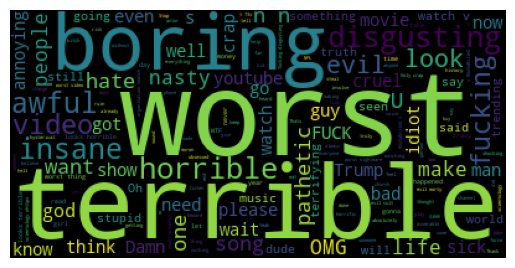

In [37]:
'''
    this for negative comments
if you want to generate  wordcloud as view you can use imshow() from matplotlib
    after that we get the positive keyword that we can show to our stakeholder or client
    this shows negative polarity data
    these are the keywords that customer are using these comments on the youtube comment section
    
'''
plt.imshow(wordcloud2)
plt.axis('off')

In [38]:
'''PERFORMING EMOJI'S ANALYSIS'''


'''EDA part

    Exploratory Data Analysis (EDA) is a method of analyzing and summarizing datasets to uncover patterns
    trends, and insights. EDA is an important first step in any data analysis
    A key component of EDA is data visualization, which is the graphical representation of data using plots, charts, and graphs

    emojies extensively count means count of the frequent emojies that have been mostly used


'''

'EDA part\n\n    Exploratory Data Analysis (EDA) is a method of analyzing and summarizing datasets to uncover patterns\n    trends, and insights. EDA is an important first step in any data analysis\n    A key component of EDA is data visualization, which is the graphical representation of data using plots, charts, and graphs\n\n    emojies extensively count means count of the frequent emojies that have been mostly used\n\n\n'

In [39]:
!pip install emoji==2.2.0

In [40]:
import emoji

In [41]:
emoji.__version__

'2.2.0'

In [42]:
'''so we can see in the comment text there is an emoji with the text in the comment text can we extract emoji from the text
    so 1st take the text with the emoji text
    trending 😉

'''
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [43]:
'''extracting the only emoji fro the text'''
comment='trending 😉'

[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [44]:
all_emojis_list=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [45]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [46]:
'''for each emoji i need count for each of the element we need to check how many time the emoji repeating
    to do this we have to use collection package
'''

from collections import Counter

In [47]:
'''finding out the most common emojies count'''
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [48]:
'''in one list i need emojies and one list we need count of the emoji's
so that we can simply ploted in bar chart'''
Counter(all_emojis_list).most_common(10)[0]
'''with this we are getting the count emoji and the count of the emoji of the 0 th position emoij'''

'with this we are getting the count emoji and the count of the emoji of the 0 th position emoij'

In [49]:
Counter(all_emojis_list).most_common(10)[0][0]
'''with this indexing we are getting the result of the oth indext o th position value which is emoji'''

'with this indexing we are getting the result of the oth indext o th position value which is emoji'

In [50]:
Counter(all_emojis_list).most_common(10)[0][1]
'''with this indexing we are getting the result of the oth indext o th position value which is count of the emoji'''

'with this indexing we are getting the result of the oth indext o th position value which is count of the emoji'

In [51]:
'''so we have to store all the emojis in the list
    so the variable is the [1st]  index and inside this list [0] emoji is present
'''
emojis=[Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [52]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
frequency=[Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [54]:
frequency

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
'''so we get the both the list 
    1st all the emojis list
    2nd all the frequency of the emojis
    
    now we can create bar chart
'''

In [55]:
'''for barchart we need to import plotly and for graph representation graph_objs'''
!pip install plotly

In [56]:
'''for barchart we need to import plotly and for graph representation graph_objs'''
import plotly.graph_objs as gp
from plotly.offline import iplot

In [57]:
'''setting the dimension in the bar object gp.bar'''
bar_obj=gp.Bar(x=emojis,y=frequency)

In [58]:
'''so if we wanted to this bar_obj in the Barplot we have to use iplot
    we are getting the barchart of the emojis which extreamly used by the user 
'''
iplot([bar_obj])

In [59]:
'''collecing entire dataset of youtube
   and doing data transformation  data cleaning data featurization we end up getting prepared data we can do various analysis
   we have to collect the data which is known raw data we have to do data cleaning when clean the data we get featurized data
   now we can do data analysis 
   
   
   whenever you interacting with your system can we create access or modify a file or location since you have to various things
   in your os you have to import os package and using list directory function
'''

import os
files=os.listdir(r'E:\template\data analysis\additional_data')

In [60]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [61]:
files_csv=[file for file in files if '.csv' in file]

In [62]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [63]:
'''while collecting the data incase we are any kind of warning so we have to import warnings module'''

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
'''now we have to insert this data into another dataframe
    
    full_df="big dataframe"
    
    1st define the blank dataframe we will insert each of the dataframe  into this data frame
    can i iterate all the csv file  using for loop 
    for file in file_csv we will create a dataframe of each of the file using pd.read_csv
    
    now storing each of the dataframe into the object file current=pd.read()
    now concatinate this dataframe in to the full_df 
    
    also update full_df=pd.concatinate([destination_Df,current_df])


'''

In [64]:
'''1st define the blank data frame
    adding the path with raw string
    
    encoding parameter 
    
    since you have data with various various countries encoding may change depending upon a data country data regional data
    iso-8859-1= best encoding for collection of data with various countries various regions ,error_badline=false
'''
full_df=pd.DataFrame()
path=r'E:\template\data analysis\additional_data'
for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    '''updating the full_df everytime'''
    full_df=pd.concat([full_df,current_df],ignore_index=True)

In [65]:
'''getting rows and colums'''
full_df.shape

(375942, 16)

In [66]:
'''how to export data into csv,json,databases

    we have raw data checking if there duplicate row or irrelivant row is present or not
    if we have then remove it first then load this data
1st checking the duplicate rows present in the df using duplicate function() it returns boolean value True or False 
if present True Or false

'''
'''passing the filter into the full_df and getting the no of duplicate rows present in the df


    duplicate(key=) here key parameter presents the default value is key='first' if 1st 2nd 3rd rows are same if we have a value
    
    key=first (default) then it says that marks all the rows duplicate except 1st one
    
    key='last' then 1st and 2nd rows is marked as duplicate
    
    key='false' then all the rows are marked as duplicate
    
    if you have to strictly removed all the duplicate rows then key="false"

'''

'''no of duplicates rows'''
full_df[full_df.duplicated()].shape

(36417, 16)

In [67]:
'''removing the duplicate rows'''
full_df=full_df.drop_duplicates()

In [68]:
'''before removing duplicates df 36417 and after removing duplicates df 339525'''
full_df.shape

(339525, 16)

In [69]:
'''now after removing the duplicate rows export the data frame into csv,json '''
'''full_df exporting to csv format using to_csv and inside to_csv('enter the path wher you want to export the data/file name')'''

'''exporting the sample data 1000 rows into csv format in the file using path/filename.csv'''
full_df[0:1000].to_csv(r'E:\template\data analysis/youtube_sample.csv',index=False)

''' this is (full_df) large amount of data instead of large data we can use sample data like 1st 10k rows  '''

' this is (full_df) large amount of data instead of large data we can use sample data like 1st 10k rows  '

In [70]:
'''exporting the sample data 1000 rows into csv format in the file using path/filename.json'''
full_df[0:1000].to_json(r'E:\template\data analysis/youtube_sample.json')

In [71]:
'''              NOW IF WE WANT TO EXPORT INTO SOME DATABSE   

    we have to create some engine because using this engine you can connect to your database
    while creating your engine you cn mention what your databse file name


'''

'''creating engine'''
!pip install sqlalchemy
    
from sqlalchemy import create_engine

In [72]:
'''it allow us to connect with the database

    create_engine(url 
    
    for postgresql
    url"postgresql://
    
    for sql
    
    url "sqlite:///path where we want to create database file name"
    create_engine('sqlite:///E:\template\data analysis/youtube_sample.sqlite')
    
    in order to create a engine for the sqlite database
    then we have to mention sqlite:///database file name
    
    youtube_sample.sqlite this the databse file which will have deafault table have a users table
    
    in this users table we can insert our full_df or exporting the dataframe into the table which is inside
    sqlite database  just to do this we have ibuild function in the pandas
    
    
    )

'''
engine=create_engine(r'sqlite:///E:\template\data analysis/youtube_sample_data.sqlite')

In [73]:
'''in this users table we can insert our full_df or exporting the dataframe into the table which is inside
    sqlite database  just to do this we have ibuild function in the pandas
    
    so to_sql('table',connection,if_exists=just append)
    
    '''
'''WARNING PLEASE DO NOT RUN THIS LINE MORE THAN ONCE BECAUSE WE WILL GET THE VALUE ERROR BY INSERTING THE SAME ROWS AGAIN
    AGAIN
        
'''

'''1000 records succesfully transferd to the sql users table 
    we'll have sqlite file 1000 rows of data into sqlite file which have the table users you can read the data from this 
    file using pandas and sqlite3 packge
'''
full_df[0:1000].to_sql('Users',con=engine ,if_exists='append')

1000

In [78]:
'''               ANALYZING MOST LIKED CATEGORY

            which category has maximum likes
'''

'               ANALYZING MOST LIKED CATEGORY\n\n            which category has maximum likes\n'

In [74]:
full_df.head(5)
'''so we  have a feature as category id but do not have the feature as category name we need category name
    like category movies so we need {1:'film & animation'} we can store in the dictionary data structure and map 
    this dictionary to the category_id features once we mapped we will get category name


'''

"so we  have a feature as category id but do not have the feature as category name we need category name\n    like category movies so we need {1:'film & animation'} we can store in the dictionary data structure and map \n    this dictionary to the category_id features once we mapped we will get category name\n\n\n"

In [75]:
'''unique category id'''
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [76]:
'''reading the json file'''
json_df=pd.read_json(r'E:\template\data analysis\additional_data/US_category_id.json')

In [77]:
'''items holds the dictionary itself each of the row is a dictionary'''

json_df
'''in json_df items hold dictionary'''

'in json_df items hold dictionary'

In [78]:
json_df['items'][0]

'''each of the row itself is a dictionaries

  so we will get outer dictionary and in inner dictioray snippet 
  
  {'kind':'youtube category'
  id:1( this is category id  ),{
  snippet:'channel id':'',
  title:'film & animation', for category id 1 title is ;dilm and animation 
  }
  }

 it means for each of the row we will end up getting tilte and category id
'''

'each of the row itself is a dictionaries'

In [79]:
'''describing blank dictionary'''
cat_dict={}
'''for item in json_df['items'].values 
    it will return array representation ,i will access each of the item from the items feature which is a dictionary
    itself from this dictionary i need id and title(from each of the row)
    
    once you access each pair of the each row we can insert the pair into dictionary
    in order to insert the pair(key,value)  into the dictionary dict[key]=value
    
    so 1st we need title  so item we need to go inside inner dictionary and we have to go key['title']
    
    item['snippet']['title']=we will get the title so this is the value , i need key so item ['id']
'''
for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item['snippet']['title']

In [88]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [80]:
'''mapping the dictionary  creating new feature into full_df  using the map(cat_dict)'''
full_df['category_name']=full_df['category_id'].map(cat_dict)

In [81]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description  category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...          Music  
1  STill got a lot of packages. Probably will las...         Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...         Comedy  
3  I know it's been a while since we did this sho...  Entertainment

In [ ]:
'''                        WHICH CATEGORY HAS MAXIMUM LIKES                    '''

''' instead showcasing the maximum likes for each of the category can show beautiful matrix   
  
    25th percentile each of the category the median value 75 th percentile or maximum value or minimum value so we can using 
    
                                       BOXPLOT
  '''

'''What is percentile

like we have [0,1,2,3,4........9] so 10th percentile value will be less than specific value
we have set of numbers  25 percentile value is 32 it means that 25 % datapoints are less than 32  
we can say that 75 % datapoint are greaterthan 32  


                            we gonna use WHISKERS 
                            
                            if we want to create boxplot
'''

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

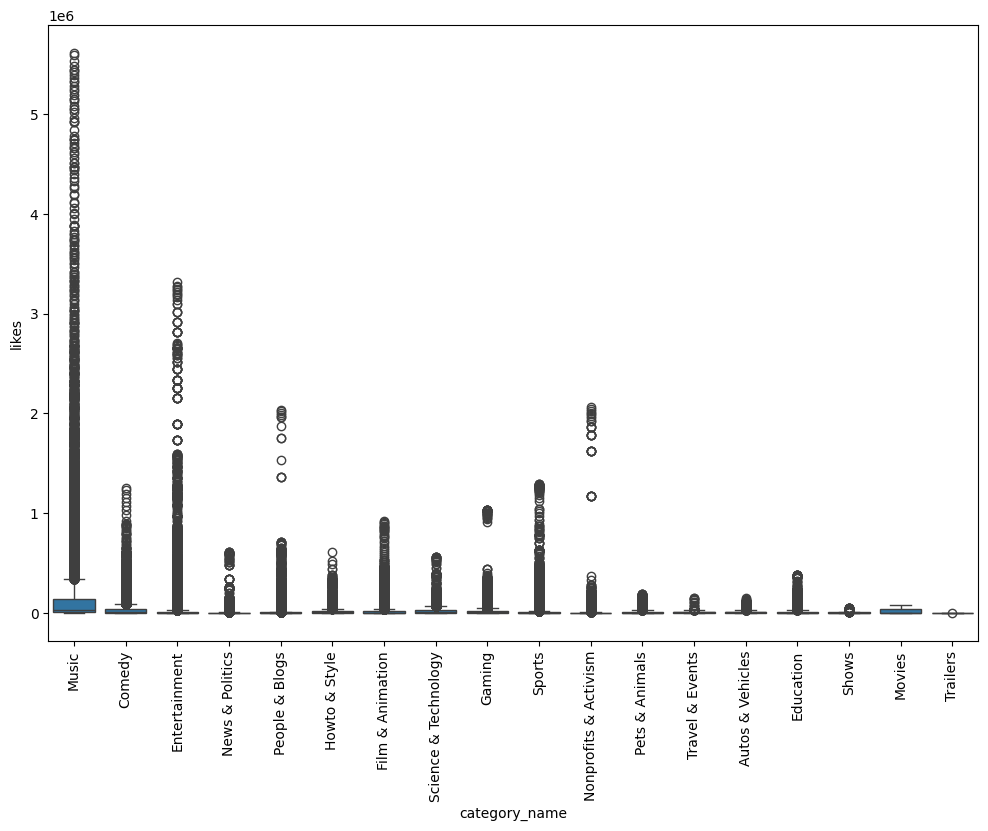

In [82]:
'''in boxplot we are passing category name  and likes as feature and data frame'''
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')
'''we are getting box plot there some categories whic are performing quite well we have couple of data points it shows that
    we have extremely high value of likes some videos

'''

In [ ]:
'''     FIND OUT WHETHER AUDIENCE IS ENGAGED OR NOT'''

'''we can think various feature  like what about like rate of the video,dislike rate,comment count rate 
    this will tell directly among all views that how many people like that videos similarly for disklike comment count
    
    
    so create these three feature 
'''

In [85]:
'''storing the all features percentage'''
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [88]:
'''we have now three new features and previous we had category name features
    now  each of the category we can plot boxplot how feature is performing regarding like rate,comment count,dislike count
'''
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

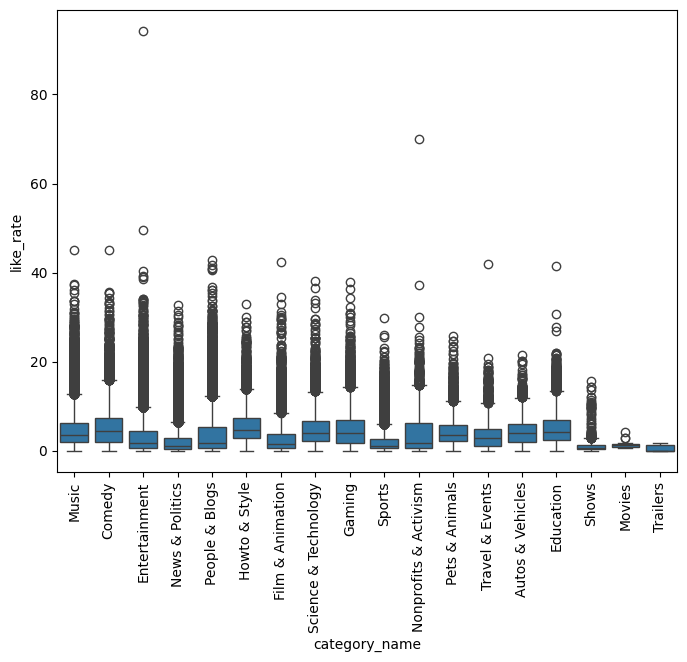

In [89]:
'''creating boxplot for like rate'''
'''getting the like_rate of the categories'''

plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='views', ylabel='likes'>

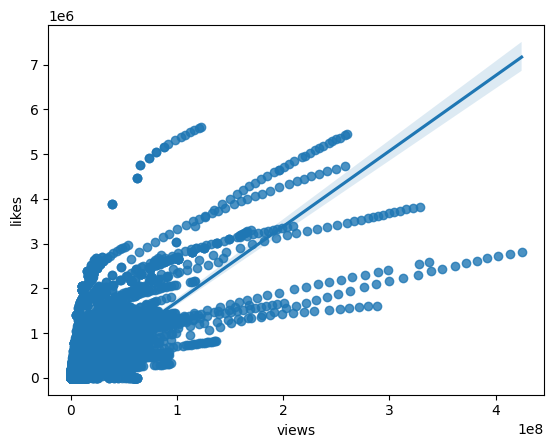

In [90]:
'''analyzing relationship between views and likes'''
'''regplot jus combination of scatter and regression line plot'''
sns.regplot(x='views',y='likes',data=full_df)

'''we are getting there is a straigh line means if views increase like will always increase in a same way in a linear fashion 
    end up getting straight line if you want to cross check you can  using correlation correlation says that if views increase 1 factor
    or 1 unit  then what unit my like will increase how vies and likes correlated each other
'''

In [92]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [98]:
'''accessing the columns '''
'''it will return he dataframe of these three features'''
'''now if we called the correlation function we will get the correlation values

  like vs views it says that it has correlation that ~0.78 it means if views is increase no of 100 likes will increase by 78
'''
full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.779531  0.405428
likes     0.779531  1.000000  0.451809
dislikes  0.405428  0.451809  1.000000

<AxesSubplot:>

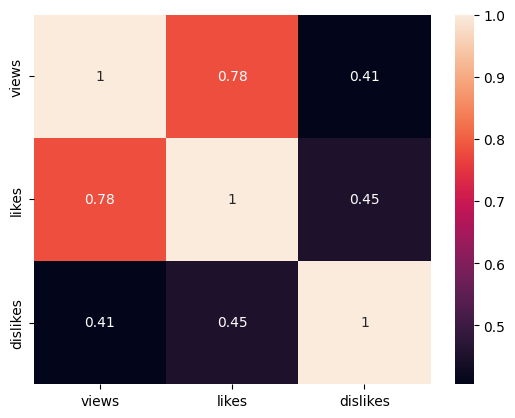

In [100]:
'''we can see the correlation using heatmap   by annot parameter we can show the correlation value '''
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

In [102]:
'''                WHICH CHANNEL HAS THE LARGEST NUMBER OF TENDING VIDEOS               


at the conclusion end of the view you will definitely look on what type of visualization we need so any how if we getting up a 

barchart we can say these are the top channels that have largest no of trending videos

'''

full_df.head(6)

'''so for each of the channel title we need to compute total no of rows '''

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...    DramaAlert   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   
5           25  2017-11-13T07:37:51.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
5      4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   

                                         description    category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...            Music   
1  STill got a lot of packages. Probably will las...           Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...           Comedy   
3  I know it's been a while since we did this sho...    Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...            Music   
5  âº Follow for News! - https://twitter.com/KEE...  News & Politics   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752  
5   7.922049      0.352218            0.927160

In [103]:
'''value_counts returns frequency table channel title and count
    we can acheive by group by

'''
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: channel_title, Length: 37824, dtype: int64

In [106]:
'''value_counts returns frequency table channel title and count
    using group by in sorted order using sort_values and reset_index() we will get the dataframe'''
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [107]:
cdf

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [110]:
'''now i need to manipulate the column name'''
cdf=cdf.rename(columns={0:'total_videos'})

In [111]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                            Kd Malts             1
37820                            Zedan TV             1
37821            Kc Kelly - Rocketprenuer             1
37822                               Kbaby             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [112]:
'''creating barchart using plotly  
import plotly.express as px using px you can call bar function   px.bar(dataframe) i want to show first 20 dataframe

  px.bar(dataframe name [0:20])
'''
import plotly.express as px
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

In [ ]:
'''we get the visualization 
which of the top 20 channel has most trending videos
 it says that wwe has 663 counts of the channel_videos
'''

In [113]:
'''                    Does punctuatuions in title and tags have any relation with views,likes,dislikes,comments? 


'''

full_df['title']

0               Eminem - Walk On Water (Audio) ft. BeyoncÃ©
1                             PLUSH - Bad Unboxing Fan Mail
2         Racist Superman | Rudy Mancuso, King Bach & Le...
3                                  I Dare You: GOING BALD!?
4               Ed Sheeran - Perfect (Official Music Video)
                                ...                        
375936    BTS Plays With Puppies While Answering Fan Que...
375938                           True Facts : Ant Mutualism
375939    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
375940                  How Black Panther Should Have Ended
375941    Official Call of DutyÂ®: Black Ops 4 âÂ Mult...
Name: title, Length: 339525, dtype: object

In [115]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [116]:
'''first we have to count the total no of the punctuation count of the each of the text so that i m able to comeup with a conclusion that
    whether the punctuaion in tilte in text have any relation with likes or not 
    
    if punctuation count is increase views is increase or not
    if punctuation will decrease whether views will decrease or not
    
    we need to import string package will help us to compute the total punctuation in any text data

'''
import string

In [117]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
'''so if we say character in text  Eminem - Walk On Water (Audio) ft. BeyoncÃ©'  

    if each of the char is present in the punctuation then consider the particular character
    
    getting the len of the punctuation list
    
'''

len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [126]:
'''appying each of the title to the pun_count function to find out  len of the punctuation present in the text'''
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [127]:
'''now we have to pass the dataframe in this punctuation function in order to find the len of punctuation 
    so we have to use the sample data

'''
sample=full_df[0:10000]

In [128]:
'''creating the new feature in the sample count_punc'''
sample['count_punc']=sample['title'].apply(punc_count)

In [129]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

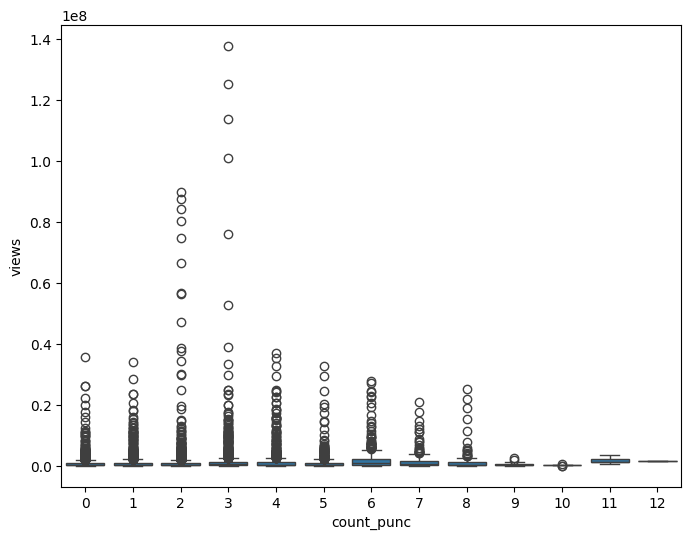

In [130]:
'''now the problem is
 
 Does punctuatuions in title and tags have any relation with views,likes,dislikes,comments?
 
 for this use boxplot
 
 if the punctuation count 0 how are the datapoints distributed ,if the punctuation count 1 how exacty datapoints is 
 distributed  how are views value is distributed

'''

plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc',y='views',data=sample)
plt.show()

'''we can see when punctuation count 2 or 3 the no of views are extremly high'''

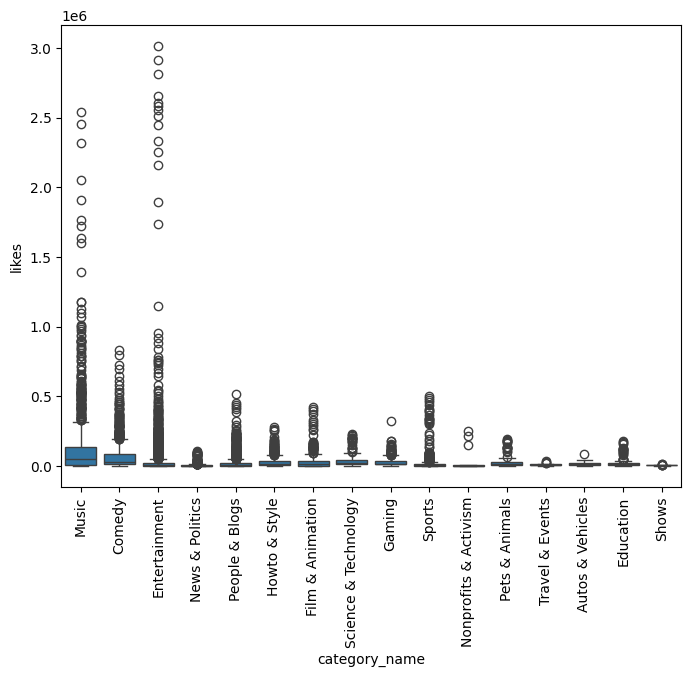

In [132]:
'''we can do for likes also'''
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='likes',data=sample)
plt.xticks(rotation='vertical')
plt.show()

'''we can see if we have the punctuation count 2,3 there is extremly probability  that you could encounter more no of likes'''